# 02805 week4 exercise
s202997 Nina Weng

***Questions:***  
*1. about the '#' and '/'<br>2. could we just use the csv in the github<br> 3. need to check the number of nodes*

## Prelude: Regular expressions
> Exercises: Regular expressions round 1.
> 
> - Read this tutorial to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.  
> - Now, explain in your own words: what are regular expressions?  
> - Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use findall to show that your regex works on this test-text. Hint: a great place to test out regular expressions is: https://regex101.com.  
> - Provide an example of a regex to match words starting with "super". Show that it works on the test-text.  

#### > Now, explain in your own words: what are regular expressions?

**Answer:  
Regular expression is a way to define the pattern of the text. It use differnt units to represent different kind of character so that we could use it to represent a long pattern and see if it matches with the text(or part of the text).**

# 02805 week4 exercise
s202997 Nina Weng
## Prelude: Regular expressions
> Exercises: Regular expressions round 1.
> 
> - Read this tutorial to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.  
> - Now, explain in your own words: what are regular expressions?  
> - Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use findall to show that your regex works on this test-text. Hint: a great place to test out regular expressions is: https://regex101.com.  
> - Provide an example of a regex to match words starting with "super". Show that it works on the test-text.  

> Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use findall to show that your regex works on this test-text. Hint: a great place to test out regular expressions is: https://regex101.com.

In [1]:
# get the text from the website
import requests
r = requests.get('https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt')
text= r.text

In [2]:
import re

fourdigits = re.findall(r'[\s,.\'();]\d\d\d\d[\s,.\'();]', text) # not sure
for fd in fourdigits:
    print(fd[1:-1])

1234
9999


> Provide an example of a regex to match words starting with "super". Show that it works on the test-text.

In [3]:
superwords = re.findall(r'\ssuper[\w-]*[\s,.;\']', text)
for sw in superwords:
    print(sw[1:-1])

superpolaroid
supertaxidermy
superbeer


> Exercise: Regular expressions round 2. Show that you can extract the wiki-links from the test-text. Perhaps you can find inspiration on stack overflow or similar. Hint: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.

In [6]:
wikipage = 'https://en.wikipedia.org/wiki/'

wikiitems = re.findall(r'\[\[[\(\)\w\s\-\|]*\]\]', text) 
for item in wikiitems:
    print(item)

[[drinking vinegar]]
[[gentrify]]
[[hashtag]]
[[Bicycle|Bicycle(two-wheeled type)]]
[[Pitchfork|Pitchfork Magazine]]


In [7]:
# get the wiki links
wikilinks = []
for item in wikiitems:
    keywords = item[2:-2].split('|')[0].replace(' ','_') # remove the '[[',']]' and choose the first keyword if there's a '|', then replace the space with underline
    link = wikipage+keywords
    wikilinks.append(link)
for w in wikilinks: print(w)

https://en.wikipedia.org/wiki/drinking_vinegar
https://en.wikipedia.org/wiki/gentrify
https://en.wikipedia.org/wiki/hashtag
https://en.wikipedia.org/wiki/Bicycle
https://en.wikipedia.org/wiki/Pitchfork


## Prelude part 2: Pandas DataFrames

## Part A: Download the Wikipedia pages of characters
> It's time to download all of the pages of the characters. Use your experience with APIs from Week 1. 

> A challenge *(Leaving it just for now)*
>> However, if you're feeling tough, you can head over to our Hardcore List Parsing notebook, full of tricks to help you try out creating these lists on your own! If you manage to do both Marvel and DC on our own, you will officially have graduated to brown-belt Python hacker. (Black belt challenges coming later in the year.)

In [4]:
# as some wiki links contains symbols like ':' and '/' which is not allowed in file name
# then we use a function to replace those symbols when necessary

# get the name for file saving and reading
def file_saving_reading_name(s):
    s = s.replace(':','@')
    s = s.replace('/','$')
    return s

# get the name with ':' and '/'
def node_name(s):
    s = s.replace('@',':')
    s = s.replace('$','/')
    return s

In [5]:
# deal with the marvel part first
import csv
marvel_file_path = './file/marvel_characters.csv'


# collect the wikiitems
def get_wiki_ittems(csv_file_path):
    wikiitems= []
    with open(csv_file_path, encoding="utf8") as f:
        csv_reader = csv.reader(f) 
        for row in csv_reader: 
            # for the dc file, every row end with ':'
            contents = row[0].split(';')[0]
            
            # the csv file is split by '\'
            contents = contents.split('|')
            
            # the first one is the number, and the third one is the kword if there's a link
            if len(contents) == 3 and contents[2]!=''and contents[0] != '':
                
                # collect the keywords
                # notice that the wiki links uses '_' for blank
                character_name = contents[1]
                link_keywords = contents[2].replace(' ','_')            

                # when it is with '#' it means that there's no wikilink for this character just appear somewhere in other character's pages
                # so we drop it
                # ask the TA , he suggest to use the part before #
                if len(link_keywords.split('#')) ==2 :
#                     print(keywords)
                    link_keywords = link_keywords.split('#')[0]
#                     print(keywords)
                # if there's '\"'， replace it with ''
                link_keywords = link_keywords.replace('"','')

                wikiitems.append(link_keywords)
    wikiitems = set(wikiitems)
    return wikiitems

wikiitems_marvel = get_wiki_ittems(marvel_file_path)

print(len(wikiitems_marvel))

1240


In [6]:
# get the dc wikiitems from csv
dc_file_path = './file/dc_characters.csv'

wikiitems_dc = get_wiki_ittems(dc_file_path)

print(len(wikiitems_dc))

1040


In [7]:
# download the json file
# once you done it, you could skip this step forever, this is time consuming
import requests
import json
from tqdm import tqdm


baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat ="format=json"

In [14]:
json_path = '.\data\marvel\\'

for kwords in tqdm(wikiitems_marvel):
#     kwords = wikiitems_marvel[cha_name]
    title = "titles={}".format(kwords)
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    
    r = requests.get(query)
    text= r.text
    
    # remember to use the file saving and reading version of the kwords name
    with open(json_path+file_saving_reading_name(kwords)+'.json', 'w') as f:
        json.dump(text, f)
        

100%|██████████████████████████████████████████████████████████████████████████████| 1240/1240 [06:54<00:00,  2.99it/s]


In [18]:
json_path = '.\data\dc\\'

for kwords in tqdm(wikiitems_dc):
#     kwords = wikiitems_dc[cha_name]
    title = "titles={}".format(kwords)
    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    
    r = requests.get(query)
    text= r.text
    
    with open(json_path+file_saving_reading_name(kwords)+'.json', 'w') as f:
        json.dump(text, f)

100%|██████████████████████████████████████████████████████████████████████████████| 1040/1040 [05:59<00:00,  2.89it/s]


## Part B: Building the networks
> Exercise: Build the network of Comics Characters
> 
> Now we can build the network. Isn't this a little bit cool? What a dataset :)
>
>The overall strategy for this is the following: Take the pages you have downloaded for each character. Each page corresponds to a politician, which is a node in your network. Find all the hyperlinks in a characters page that link to another node of the network (e.g. an other character). There are many ways to do this, but below, I've tried to break it down into natural steps. Keep in mind that the network should include both DC and Marvel characters (and that it is possible that some DC Characters will have links to Marvel Characters and vice-versa).
>
>Note: When you add a node to the network, also include an attribute (i.e. that specifies the universe where the character comes from; either DC, or Marvel)
>
> - Use a regular expression to extract all outgoing links from each of the pages you downloaded above.
> - For each link you extract, check if the target is a character. If yes, keep it. If no, discard it.
> - Use a NetworkX DiGraph to store the network. Store also the properties of the nodes (i.e. from which universe they hail).
> - When have you finished, you'll notice that some nodes do not have any out- or in- degrees. You may discard those from the network.

In [9]:
import os
# get the characters with the json file, as if the cha do not have a json file, it means that this character do not have a link 
# so it will be discard anyway

data_folder = '/Users/zhengqing/desktop/marvel_characters.csv'
def get_names(dir_):
    chas = []
    file_list = os.listdir(dir_)
    for f in file_list:
        name = f.split('.json')[0]
        name = node_name(name)
        chas.append(name)
    return chas

characters_marvel = get_names(data_folder)

print('Marvel character number:{} (which has wiki link)'.format(len(characters_marvel)))

NotADirectoryError: [Errno 20] Not a directory: '/Users/zhengqing/desktop/marvel_characters.csv'

In [20]:
# deal with dc character
data_folder = './data/dc'
characters_dc = get_names(data_folder)

print('DC character number:{} (which has wiki link)'.format(len(characters_dc)))

DC character number:1039 (which has wiki link)


> - Use a regular expression to extract all outgoing links from each of the pages you downloaded above.  
> - For each link you extract, check if the target is a character. If yes, keep it. If no, discard it.

In [1]:
# use a json file to record the edges bewteen links
import json
import re

# get the wiki keywords from a certain text
def get_wiki_kwords(text):
    wikiitems = re.findall(r'\[\[[\(\)\w\s\-\|]*\]\]', text) 
    wikikwords = []
    for item in wikiitems:
        keywords = item[2:-2].split('|')[0].replace(' ','_')
        # remove the '[[',']]' and choose the first keyword if there's a '|', then replace the space with underline
        
        wikikwords.append(keywords)
    return wikikwords


# bulid the nodes
comics_cha = {}
for cha_name in characters_marvel:
    comics_cha[cha_name] = {}
    comics_cha[cha_name]['type'] = 'Marvel'
    comics_cha[cha_name]['edges'] = []
    
for dc_name in characters_dc:
    comics_cha[dc_name] = {}
    comics_cha[dc_name]['type'] = 'DC'
    comics_cha[dc_name]['edges'] = []
    

cha_all = characters_marvel+characters_dc
# for each node, search for the possible links
for cha_name in cha_all:
    # get the json file which contains the data of corresponding page
    if cha_name in characters_marvel:
        file_path = './data/marvel/'+file_saving_reading_name(cha_name)+'.json'
    else:
        file_path = './data/dc/'+file_saving_reading_name(cha_name)+'.json'
    
    with open(file_path) as f:
        infor = json.load(f)
    
    # extract all the links using regular expression
    kwords = get_wiki_kwords(infor)
    
    # to check whether the link is in character_name 
    cha_links = []
    for k in kwords:
        if k in comics_cha.keys(): cha_links.append(k)
    
    # avoid repeating
    cha_links = set(cha_links)
    
    # add the links to dict
    comics_cha[cha_name]['edges'].extend(cha_links)

# store the dataas json
file_path = './data/comics_cha.json'
with open(file_path, 'w') as f:
        json.dump(comics_cha, f)

NameError: name 'characters_marvel' is not defined

> - Use a NetworkX DiGraph to store the network. Store also the properties of the nodes (i.e. from which universe they hail).

In [22]:
import networkx as nx

G = nx.DiGraph()


# get the attribute from comics_cha
attr_dict = {}
for each in comics_cha:
    attr_dict[each] = comics_cha[each]['type']

# add nodes    
G.add_nodes_from(comics_cha.keys())
# add attribute of type
nx.set_node_attributes(G, attr_dict,'type')


# add links
for each in comics_cha:
    for link in comics_cha[each]['edges']:
        G.add_edge(each,link)

print('number of nodes in network:{}'.format(len(G.nodes())))
print('number of links in network:{}'.format(len(G.edges())))

number of nodes in network:2277
number of links in network:33461


> Exercise: Simple network statistics and analysis
> 
> - What is the number of nodes in the network?
> - More importantly, what is the number of links?
> - What is the number of links connecting Marvel and DC? What do those links mean?
> - Plot the in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
    >>   - Compare the degree distribution to a random network with the same number of nodes and p
    >>   - Compare the degree distribution to a scale-free network with the same number of nodes.
> - Who are top 5 most connected characters? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected.
> - Who are the top 5 most connected Marvel characters (again in terms of both in/out-degree)?
> - Who are the top 5 most connected DC characters (again in terms of both in/out-degree)?

> - What is the number of nodes in the network?
> - More importantly, what is the number of links?

In [23]:
print('number of nodes in network:{}'.format(len(G.nodes())))
print('number of links in network:{}'.format(len(G.edges())))

number of nodes in network:2277
number of links in network:33461


> What is the number of links connecting Marvel and DC? What do those links mean?

In [24]:
links_connecting = []
for e in G.edges():
    if nx.get_node_attributes(G, 'type')[e[0]] != nx.get_node_attributes(G, 'type')[e[1]]:
        links_connecting.append(e)

In [25]:
num_of_connected_links = len(links_connecting)
print('There are {} links connect Marvel and DC. These links mean that there are at least {} directed relationship \
bewteen the Marvel and DC characters.'.format(num_of_connected_links,num_of_connected_links))

There are 781 links connect Marvel and DC. These links mean that there are at least 781 directed relationship bewteen the Marvel and DC characters.


> - Plot the in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
    >>   - Compare the degree distribution to a random network with the same number of nodes and p
    >>   - Compare the degree distribution to a scale-free network with the same number of nodes.

In degree	max:431	min:0
Out degree	max:126	min:0
Nodes with in-degree larger than 100: 51


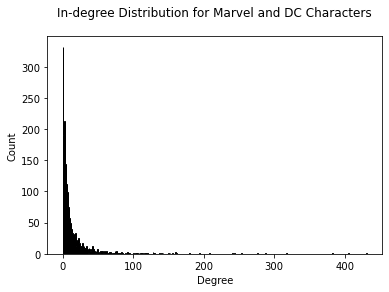

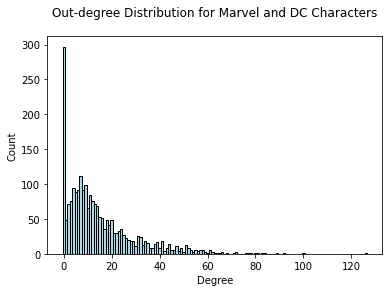

In [26]:
import collections
import matplotlib.pyplot as plt
in_degrees = [d for n,d in G.in_degree()]
out_degrees = [d for n,d in G.out_degree()]


def plot_degree_distribution(degrees,title):
    degreeCount = collections.Counter(degrees)
    degree, count = zip(*degreeCount.items())

    # plot
    width = 1.0
    plt.bar(degree, count, align='center', width=width,edgecolor ='black',color = 'lightblue')
    plt.title(title,pad = 20.0)
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()
    
print('In degree\tmax:{}\tmin:{}'.format(max(in_degrees),min(in_degrees)))
print('Out degree\tmax:{}\tmin:{}'.format(max(out_degrees),min(out_degrees)))
print('Nodes with in-degree larger than 100: {}'.format(len([i for i in in_degrees if i >100])))
plot_degree_distribution(in_degrees,'In-degree Distribution for Marvel and DC Characters')
plot_degree_distribution(out_degrees,'Out-degree Distribution for Marvel and DC Characters')

**Answer:  
There is a hub in in-degree(which is 411), and the small in-degrees are in huge amount compared with out-degree. According to the meaning of this network, each link represnts there is a link from page A to page B. Therefore, for unimportant characters, it will be less possible for them to be mentioned in other characters' page, which might cause the large amout of 0 and 1 in in-degrees. On the other hand, for very important characters who has lots of relationship with others, will have a larger probability of being a hub in in-degree.**

>> - Compare the degree distribution to a random network with the same number of nodes and p

In [27]:
# calculate the number of nodes and p
N = len(G.nodes)
p = len(G.edges)/((N-1)*N)

print('N:{}\tp:{}'.format(N,p))

N:2277	p:0.006456596221248166


In degree	max:30	min:3
Out degree	max:30	min:3
Nodes with in-degree larger than 100: 0


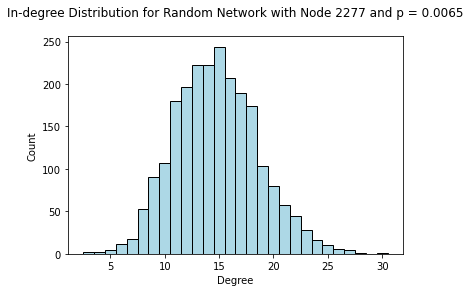

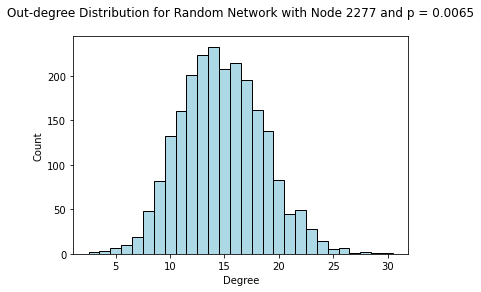

In [28]:
G_ER = nx.erdos_renyi_graph(N,p,seed=2020,directed = True)

in_degrees = [d for n,d in G_ER.in_degree()]
out_degrees = [d for n,d in G_ER.out_degree()]
print('In degree\tmax:{}\tmin:{}'.format(max(in_degrees),min(in_degrees)))
print('Out degree\tmax:{}\tmin:{}'.format(max(out_degrees),min(out_degrees)))
print('Nodes with in-degree larger than 100: {}'.format(len([i for i in in_degrees if i >100])))
plot_degree_distribution(in_degrees,'In-degree Distribution for Random Network with Node {} and p = {:.4f}'.format(N,p))
plot_degree_distribution(out_degrees,'Out-degree Distribution for Random Network with Node {} and p = {:.4f}'.format(N,p))

**Answer:  
It could be observed from the degree distribution that for random network, the degrees are in small range, and there is no hub in the network. Also, the degree with the largest probability in random network is around 13 while in real network, that number would be 0, means that in real world there are huge amount of nodes do not have (or have rare number of ) links. In addition to that, the in-degree distribution and the out-degree looks quite similar to each other in random nework, which is also different from real network.**

>>   - Compare the degree distribution to a scale-free network with the same number of nodes.

In degree	max:1267	min:0
Out degree	max:183	min:0
Nodes with in-degree larger than 100: 6


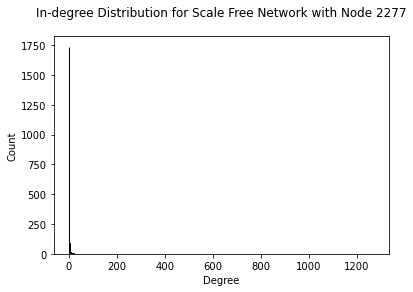

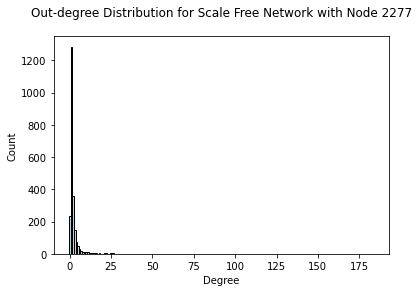

In [29]:
G_SF=nx.scale_free_graph(N)

in_degrees = [d for n,d in G_SF.in_degree()]
out_degrees = [d for n,d in G_SF.out_degree()]
print('In degree\tmax:{}\tmin:{}'.format(max(in_degrees),min(in_degrees)))
print('Out degree\tmax:{}\tmin:{}'.format(max(out_degrees),min(out_degrees)))
print('Nodes with in-degree larger than 100: {}'.format(len([i for i in in_degrees if i >100])))
plot_degree_distribution(in_degrees,'In-degree Distribution for Scale Free Network with Node {}'.format(N))
plot_degree_distribution(out_degrees,'Out-degree Distribution for Scale Free Network with Node {}'.format(N,p))

**Answer:  
We could see that there is a hugh hub with more than 1000 degree in in-degree of scale free network, which is way more larger than something around 400 compared with real network of comics characters. However, the number of hubs with more than 100 in-degrees are quite low compared with real network. This fact indicates that in comics network, the amount of main character is not that small (there are 39 hubs with more than 100 in-degrees), the stories are told not only around just 4-5 characters, but in scale free network, the number of hubs will be less while one of which contains an overwhelmly number of in-degrees.**

> - Who are top 5 most connected characters? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected.

In [30]:
in_degrees = [(n,d) for n,d in G.in_degree()]
in_degrees.sort(key=lambda x: x[1],reverse= True)
print(in_degrees[0:5])

[('Spider-Man', 431), ('Superman', 405), ('Batman', 383), ('Captain_America', 382), ('Justice_League', 318)]


In [31]:
out_degrees = [(n,d) for n,d in G.out_degree()]
out_degrees.sort(key=lambda x: x[1],reverse= True)
print(out_degrees[0:5])

[('Hood_(comics)', 126), ('Venom_(Marvel_Comics_character)', 100), ('New_Warriors', 92), ('Justice_League', 89), ('Psylocke', 84)]


**Answer:  
Is there anybody be able to answer this. Not a big fun of marvel or dc.**

> - Who are the top 5 most connected Marvel characters (again in terms of both in/out-degree)?
> - Who are the top 5 most connected DC characters (again in terms of both in/out-degree)?

In [32]:
marvel_cnt = 0
dc_cnt = 0
for in_d in in_degrees:
    if in_d[0] in characters_marvel and marvel_cnt<5:
        print('MARVEL:'+str(in_d))
        marvel_cnt+=1
    if in_d[0] in characters_dc and dc_cnt<5:
        print('DC:'+str(in_d))
        dc_cnt+=1
    if dc_cnt>=5 and marvel_cnt>=5:
        break

MARVEL:('Spider-Man', 431)
DC:('Superman', 405)
DC:('Batman', 383)
MARVEL:('Captain_America', 382)
DC:('Justice_League', 318)
MARVEL:('Iron_Man', 317)
MARVEL:('Hulk', 288)
MARVEL:('Wolverine_(character)', 276)
DC:('Wonder_Woman', 241)
DC:('Lex_Luthor', 208)


In [33]:
marvel_cnt = 0
dc_cnt = 0
for out_d in out_degrees:
    if out_d[0] in characters_marvel and marvel_cnt<5:
        print('MARVEL:'+str(out_d))
        marvel_cnt+=1
    if out_d[0] in characters_dc and dc_cnt<5:
        print('DC:'+str(out_d))
        dc_cnt+=1
    if dc_cnt>=5 and marvel_cnt>=5:
        break

MARVEL:('Hood_(comics)', 126)
MARVEL:('Venom_(Marvel_Comics_character)', 100)
MARVEL:('New_Warriors', 92)
DC:('Justice_League', 89)
MARVEL:('Psylocke', 84)
DC:('Deathstroke', 83)
MARVEL:('Captain_America', 81)
DC:('The_Brave_and_the_Bold', 78)
DC:('Crime_Syndicate_of_America', 72)
DC:('Project_Cadmus', 71)
